# Health Information Systems and Decision Support Systems
# WPO 4: - CAD Systems (20/03/2020)
***
*Panagiotis Gonidakis, Jakub Ceranka, Pieter Boonen, Jef Vandemeulebrouke*<br>
*Department of Electronics and Informatics (ETRO)*<br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=#1337DD>
Nathan Sennesael
Student ID:
UGent: 01507095<br>
Guylian Stevens
Student ID:
UGent: 01206699

</font>

### Goal
The goal of this practical session is to get an insight into artificial neural networks and convolutional neural networks. Your tasks will involve examining and preprocessing the data, training various neural networks and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook, the image files representing the necessary graphs and the report in .ipynb and .html format. The grade from this practical session will contribute to your final grade.

You are kindly requested to submit the <b> .ipynb </b>, an exported <b>.html</b> version  with all the cells properly executed and a <b>.zip</b> file containing all the <b>images</b> displaying the tensorboard training/validating curves </b>(in case are not displayed in the .ipynb).

Please use the Canvas or Ufora assignment functionality to upload your reports.

The deadline of the submission is in <b> 09/04/2020, 23:59 pm. </b>.

If you have difficulties submitting your assignment, send it to [jceranka@etrovub.be](mailto:jceranka@etrovub.be) 

Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be)

# Libraries
During this practical session, the following libraries will be used:

* Numpy (np)
* Glob
* Simple ITK (sitk)
* Matplotlib
* Sklearn
* Tensorflow (tf)
* TFLearn / (you can also use keras)

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using **version** command. 

* If you use your own laptop, you will need to install the two new modules. Otherwise, all the necessary software is already installed at the lab's PCs. 

* These expirements are simplified in order to be run without the need of a powerful GPU. However some training tasks may take 30-40 minutes using a CPU. You can accelerate your expirements if you work on [Google colab](https://colab.research.google.com/) framework where a GPU is offered. Then you need to create a GoogleDrive account and upload all the necessary data (scripts + data). 
For more information look [here](https://colab.research.google.com/) and [here](https://colab.research.google.com/notebooks/gpu.ipynb)

### How to  install TFLearn

TFLearn requires Tensorflow to be installed. For the purpose of this excercise you are promted to install Tensorflow with <b>CPU support only</b>.

* https://www.tensorflow.org/install/ <p>
* https://www.tensorflow.org/install/install_linux  <p>
* https://www.tensorflow.org/install/install_mac  <p>
* https://www.tensorflow.org/install/install_windows  <p>

Then, install TFLearn: 
* http://tflearn.org/installation/

Generally, open the anaconda prompt and then type:
 ```pip install tensorflow``` and after ```pip install tflearn```
 
(*) Keep in mind that recently there is a new version of tensorflow. Depending on the python version you are working you might donwload tensorflow 1 or 2. For python 3.6, tensorflow 2.1.0 is by default is downloaded whereas for python 3.7, tensorflow 1.14.0. It is advised to verify which version it is being used before looking for any documentation as the APIs differ.

(*) Alternally, if you have compatability issues or your are more familiar with keras, you can install [keras](https://keras.io/#installation) which is very similar to tflearn.

# Lung Nodule Analysis 
Lung cancer is the leading cause of cancer-related deaths worldwide. Screening high risk individuals for lung cancer with low-dose CT scans is now being implemented in the United States and other countries are expected to follow soon. In CT lung cancer screening, millions of CT scans will have to be analyzed, which is an enormous burden for radiologists. Therefore, there is a lot of interest in development of computer algorithms to optimize cancer screening.

<img src="images/luna16_image.png">

A vital first step in the analysis of lung cancer CT scans is the detection of pulmonary nodules, which may or may not represent early stage lung cancer. Many Computer-Aided Detection (CAD) systems have already been proposed for this task. 

The LIDC/IDRI data set is publicly available, including the ground-truth annotations of nodules performed by four radiologists.

This practical session is inspired from the challenge [LUNA16](https://luna16.grand-challenge.org/home/), which focused on a large-scale evaluation of automatic nodule detection algorithms on the LIDC/IDRI data set.

<img src="images/lung_cancer1.png">


### Using LIDC/IDRI data set in this practical session

For the needs of this practical session, we will look for an algorithm that only determines the likelihood for a given location in a CT scan to contain a pulmonary nodule. Furthermore, we have included a very small part of the LIDC/IDRI data set and we will use only a slice of suspicious regions of a CT scan.

### Data augmentation

Originally our dataset was very unbalanced. There were a lot samples of non-nodules (negatives) but very few samples of nodules (positives). Machine learning algorithms and specifically neural networks and convolutional neural networks require to be trained on balanced dataset, meaning all the classes should be equally represented in the training set. 

Using data augmentation methods (**rotation and translation**), positive samples were massively augmented in order to balance the two classes (nodules and non-nodules)

### Ground Truth data

Categorical data are variables that contain label values rather than numeric values. In our dataset, a sample can represent a nodule or a non-nodule area, so initially we have our ground truth data in a categorical form. Many machine learning algorithms cannot operate on label data directly. They require all input variables to be numeric. This means that categorical data must be converted to a numerical form. This involves two steps:
1. Integer Encoding
2. One-Hot Encoding.

As a first step, each unique category value is assigned an integer value. That's why in our dataset, a sample which represents a nodule will have as a label **1** and a sample which represents a non-nodule area will have as a label **0**.

For our case, this enconding step would be enough since we have only two categories. However, in a more general problem with more than two classes, using this encoding allows the model to assume a natural ordering between categories which may result in poor performance or unexpected results. That's why, one hot encoding can be appled to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. 

Therefore, a  nodule will be represented by the binary variable [1,0] and a non-nodule area by the binary variable [0,1].

<img src="images/lung_cancer2.png">


# Part 1: Visualize, load and prepare data for Machine Learning Algorithms

CT images are stored in MetaImage (mhd/raw) format. Each .mhd file is stored with as a header file (.mhd) and a corresponding pixeldata file (.raw). To load a CT image, just **load the .mhd header file** and data from the binary .raw file will be automatically loaded.

If you look carefully at the name of each .mhd file, you can extract useful information for a specific sample. You can identify its **number id**, its **size**, if the image was produced by a **data augmentation** method and if it contains a **nodule or not**.

For example: *20046_x0y0z0_20x20x6_r0_1.mhd*
* **20046**:   number of candidate patch
* **x0y0z0**: no translation in any axis (if augmentation is used it is mentioned by the angle in the corresponding axis)
* **20x20x6**: size of the image in voxels
* **r0**:     no rotation
* **1**:      it is a positive sample - represents a nodule
* **.mhd**:   it is a mhd file (this is the file which can be loaded)

### Task 1: Import necessary libraries

Load all necessary libraries using the **import** statement and check for errors.

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf
import SimpleITK as sitk
import re


### Task 2: Inspect the dataset

1. Using SimpleITK, create a function to load .mhd files (__Tip:__ The function should return a numpy array - sitk.GetArrayFromImage( ) )
2. Visualize the 6 slices of a chosen patch using matplotlib subplot figure and mention if it is a positive or a negative patch.
3. Visualize some augmented samples from the same candidate region using matplotlib subplot of the same patch and mention the augmentation method. Check visually if the observed patch was modified using the same augmentation method that is mentioned in the samples' filename.
4. Count your files. How many positives and negatives there are in this dataset? (__Tip:__ Use glob library to get the number of specific files in your dataset)

In [11]:
#Import the ct images
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    #Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan

In [12]:
Patient_scan=load_itk('/Documents/prac4/Practicum4/MiniLunaDataset3/155899_x0y0z0_20x20x6_f0_1.mhd')

plt.figure(figsize=(10,8))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(Patient_scan.shape[0]):
    plt.subplot(5,6,i+1)
    plt.imshow(Patient_scan[i])
    plt.axis('off')
    plt.suptitle("Patch - 155899, positive patch, no augmentation", x=0.5, y=0.75, size=16)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\HOCUSPOCUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-517306a25469>", line 1, in <module>
    Patient_scan=load_itk('/Documents/prac4/Practicum4/MiniLunaDataset3/155899_x0y0z0_20x20x6_f0_1.mhd')
  File "<ipython-input-11-e3b2447d839a>", line 4, in load_itk
    itkimage = sitk.ReadImage(filename)
  File "C:\Users\HOCUSPOCUS\Anaconda3\lib\site-packages\SimpleITK\SimpleITK.py", line 8876, in ReadImage
    return _SimpleITK.ReadImage(*args)
RuntimeError: Exception thrown in SimpleITK ReadImage: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "/Documents/prac4/Practicum4/MiniLunaDataset3/155899_x0y0z0_20x20x6_f0_1.mhd" does not exist.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HOCUSPOCUS\Anaconda3\lib\site-packages\

RuntimeError: Exception thrown in SimpleITK ReadImage: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "/Documents/prac4/Practicum4/MiniLunaDataset3/155899_x0y0z0_20x20x6_f0_1.mhd" does not exist.

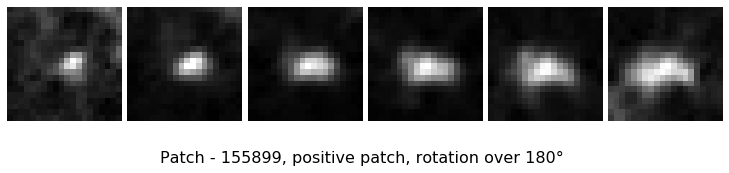

In [4]:
Patient_scan=load_itk('/Documents/prac4/Practicum4//MiniLunaDataset3/155899_x0y0z0_20x20x6_r180_1.mhd')

plt.figure(figsize=(10,8))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(Patient_scan.shape[0]):
    plt.subplot(5,6,i+1)
    plt.imshow(Patient_scan[i])
    plt.axis('off')
    plt.suptitle("Patch - 155899, positive patch, rotation over 180° ", x=0.5, y=0.75, size=16)
plt.show()

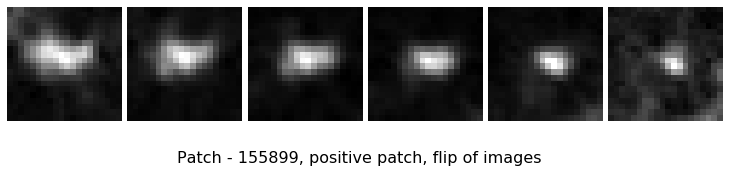

In [5]:
Patient_scan=load_itk('/home/nathan/Desktop/WPO4/MiniLunaDataset3/155899_x0y0z0_20x20x6_q180_1.mhd')

plt.figure(figsize=(10,8))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(Patient_scan.shape[0]):
    plt.subplot(5,6,i+1)
    plt.imshow(Patient_scan[i])
    plt.axis('off')
    plt.suptitle("Patch - 155899, positive patch, flip of images  ", x=0.5, y=0.75, size=16)
plt.show()

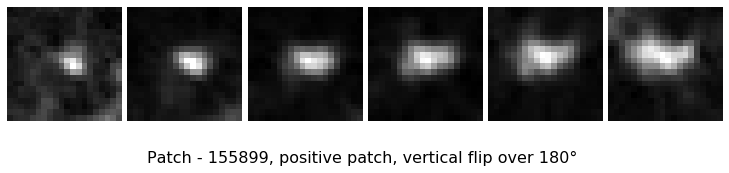

In [6]:
Patient_scan=load_itk('/home/nathan/Desktop/WPO4/MiniLunaDataset3/155899_x0y0z0_20x20x6_f180_1.mhd')

plt.figure(figsize=(10,8))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(Patient_scan.shape[0]):
    plt.subplot(5,6,i+1)
    plt.imshow(Patient_scan[i])
    plt.axis('off')
    plt.suptitle("Patch - 155899, positive patch, vertical flip over 180° ", x=0.5, y=0.75, size=16)
plt.show()

In [7]:
dir_name = '/home/nathan/Desktop/WPO4/MiniLunaDataset3/'
file_count =  glob.glob(dir_name+'*.mhd*')
pos_count = glob.glob(dir_name+'*1.mhd*')
neg_count = glob.glob(dir_name+'*0.mhd*')

print("Number of Files :      ", len(file_count))
print("Number of Positives :  ", len(pos_count))
print("Number of Negatives :  ", len(neg_count))

Number of Files :       2315
Number of Positives :   1101
Number of Negatives :   1214


### Task 3: Data pre-processing
In order to use neural-networks, we need to pre-process the data and store it in a way which can be easily interpreted by tensorflow.

First of all, separate the test set from the train set. Keep 10% of your samples as a test-set. (**Tip:** Use sklearn **train_test_split** function.)

Since 3D CNNs need a lot of computation power, we will convert our problem to 2D. Instead of using all the 6 CT slices, we will use only the 3rd CT slice. Therefore, from each sample, the 3rd slice wiil be extracted and further preprocessed. In addition, our values currently range from -1024 HU to around 2000 HU. Anything above 400 is not interesting to us, as these are simply bones with different radiodensity. A commonly used set of thresholds to normalize between is -1000 and 400. Finally the labels will be properly encoded to be used for training and testing.

Write your pre-processing tasks as python functions (listed below) and in the end create a pipeline for each sample which will be also implemented as a function.
1. Function loading the .mhd image as a numpy array.
2. Function extracting the 3rd slice of a patch. The final form of patches should be a numpy array of size **20x20** pixels.
3. Function normalizing the dataset.
The unit of measurement in CT scans is the **Hounsfield Unit (HU)**, which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia:
<img src="/images/HU_CTscannersCalibration.png">

    Create a function which is going to normalize the samples according to this table 
        * Create numpy arrays 
        * Normalize between [-1000, 400] using this normalization method 
    $npzarray = (npzarray - minHU) / (maxHU - minHU)$ <br>
         where minHU = -1000 and maxHU = 400
        * After this normalization set any values bigger than 1 to 1 and any values smaller than 0 to 0. 

4. If statement creating **1-hot** labels as a ground truth data in order to train the neural networks. (One-hot labels: [0,1] --> negative, [1,0]--> positive)
 
5. Store into .npy data binary files. (__Tip:__ Use np.save to store data.)


The pipeline should execute the functions as follows: <br>
Load mhd using sitk -> normalize -> Extract 3rd slice -> Label 

and return:
* data:  [sample_idx,20,20]
* labels: [sample_idx,2]

Data pre-processing should be done for both: train and test set.

In [8]:
#Create functions

def select_scan(Patient_scan):
    Data_scan=Patient_scan[3]
    return Data_scan


def normalize(Data_scan):
    minHU= -100
    maxHU= 400
    
    Data_scan = (Data_scan - minHU) / (maxHU - minHU)
    Data_scan[Data_scan > 1] = 1
    Data_scan[Data_scan < 0] = 0
    return Data_scan

#create list with labels for all patches
def labeling(filename):
    k=0
    if "_1.mhd" in filename:
        labeled=[1,0]
        print(1)
        k=1
    if "_0.mhd" in filename:
        labeled=[0,1]
        print(0)
        k=1
    if k==0:
        print('ERROR')
        
    return labeled


def save(Data, label, filename):
    index = re.findall("MiniLunaDataset3/(\d+)_", filename)
    datastring = "sample_{}_20_20.npy".format(index)
    labelstring= "sample_{}_2.npy".format(index)
    np.save(datastring,Data)
    np.save(labelstring,label)

In [9]:
file_count =  glob.glob(dir_name+'*.mhd*')

In [9]:
Data_list=[]
label_list=[]

for filename in file_count:
    file=load_itk(filename);
    file=select_scan(file);
    Data=normalize(file);
    Data_list.append(Data)
    label=labeling(filename);
    label_list.append(label)
#    save(Data,label,filename);

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\HOCUSPOCUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-82017403d67c>", line 4, in <module>
    for filename in file_count:
NameError: name 'file_count' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HOCUSPOCUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HOCUSPOCUS\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\HOCUSPOCUS\Anacond

NameError: name 'file_count' is not defined

In [11]:
#Split training set and test set

from sklearn.model_selection import train_test_split

Data_train, Data_test, Label_train, Label_test = train_test_split(Data_list, label_list, test_size=0.1, random_state=0)

np.save('Data_train.npy',Data_train)
np.save('Data_test.npy',Data_test)
np.save('Label_train.npy',Label_train)
np.save('Label_test.npy',Label_test)

In case you are not able to complete part 1, you can move to part 2 of the session by loading the provided .npy files. In that case you will **not** get any credits for Part 1.

# Part 2: Model training and validation

### Using TFLearn - A High Level API for Tensorflow

TFLearn introduces a High-Level API that makes neural network building and training fast and easy. This API is intuitive and fully compatible with Tensorflow.

Have a look at the following links for more information about TFLearn: <br>
http://tflearn.org/getting_started/ <p>
http://tflearn.org/tutorials/quickstart.html <p>
http://tflearn.org/models/dnn/ <p>

When you install TensorFlow, you automatically also install <b>Tensorboard</b>. During or after training you can use  it  to visualize the network and its performance. For the next tasks, <b>include both the loss and the accuracy graphs for training and also for evaluating the test-set</b>. A simple way to attach these graphs to jupyter notebook is to use Window's Snipping Tool or a similar application. Then display it either using a plain HTML ```<img src>``` or by using ```IPython.display.Image``` and ```IPython.core.display.HTML```. Don't forget to submit the actual image file with your .ipynb as the image is not saved in the notebook, it is just linked.

### Some Tips:

* Use ```np.load``` to load your data from the previously created .npy binary files.
* Use ```reshape``` method when it is needed to import data to the network.
* Make your own function to create the model for each network architecture to avoid any model conflicts.
* To define a model:
```python
 network = ...(some layers) ...
 
 network = regression(network, optimizer='...', loss='...')
 modelname = DNN(network) 
```
* Use the model's method <b>fit</b> to train your network:
```python
 modelname.fit(X,Y)
```

* Use the model's method <b>save</b> to save your trained model:
```python
 modelname.save('modelname.tflearn')
```


* Use the model's methods <b>load</b> to load a model from a previous python session.
```python
 modelname.load('modelname.tflearn') 
```

* If you trained a model in a past python session, you can load the trained model but first you have to <b>define and initialize it again</b>. 
```python
 network = ...
 
 modelname.DNN(network)    
 modelname.load('modelname.tflearn')
 modelname.predict(X)
```


* Define the directory to store the tensorboard log files by adding it as a parameter when initializing the model.
```python
 tflearn.models.dnn.DNN (network, clip_gradients=5.0, tensorboard_verbose=0, 
 tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)
```
* Use <b>Tensorbaord</b> to visualize network and performance:
Open the command prompt or the anaconda prompt (or a terminal for linux/iOS) and in the working directory type:
``` $ tensorboard --logdir='...' ```
* You may need to add tensorboard's script to your SYSTEM'S PATH to be able to launch it. 
* Use model's method <b>predict</b> to evaluate a test sample. 
```python 
modelname.predict(X) ```

* <b>If you are using the tensorflow 2 it is possible to run tensorboad using the jupyter notebook. </b>
In a jupyter cell type: ``` %tensorboard --logdir logs ```.
For more information look [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)

* If you have strange tflearn errors, restart the python kernel and <b> re-run only the cells concerning your task you currently work (i.e. run the cells concerning only the current tfmodel). Sometimes you cannot load two different tfmodels at the same python session.</b>.

(*) Depending the version of tflearn/tensorflow you are working some commands might differ. Please look online for recent documentation.

### Some Tensorboard examples.
Here are some examples of a training session. After each task, expand accuracy and loss graphs and attach them in the next cell of the notebook like we did in this exmple.

<img src="screenshots_tensorboard/all_graphs.png">
<img src="screenshots_tensorboard/accuracy_graph.png">
<img src="screenshots_tensorboard/loss_graph.png">

### Task 1: Load Data from the numpy binary files (from Part 1)
Use the numpy load function to load the data created in the previous part of the exercise. The data has to be reshaped in a specific way (see code below) in order to be compatible with the tflearn neural network input standard. After the data is successfully loaded, plot any patch and its ground truth as image title to verify that data is correctly represented.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf
import SimpleITK as sitk
import re

In [2]:
# Code for Part 2: Task 1

train_data=np.load('/home/nathan/Desktop/WPO4/Data_train.npy')
test_data=np.load('/home/nathan/Desktop/WPO4/Data_test.npy')
train_label=np.load('/home/nathan/Desktop/WPO4/Label_train.npy')
test_label=np.load('/home/nathan/Desktop/WPO4/Label_test.npy')

In [3]:
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(2083, 20, 20) (232, 20, 20) (2083, 2) (232, 2)


In [ ]:
# plot loaded data with labels
plt.figure(figsize=(10,8))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(6):
    plt.subplot(5,6,i+1)
    plt.imshow(train_data[i])
    plt.axis('off')
    plt.subtitle("lol ")
plt.show()

### Task 2: Artificial Neural Networks (1 layer)
First, lets train our classifier using an artificial neural network with just one layer, a fully connected one. This layer will have *softmax* as activation function. 

The main advantage of using this activation function is the output range. The range of the outputs will be [0,1] and the sum of all the probabilities will be equal to one. Generally, if the softmax function is used for a  multi-classification model it returns the probabilities of each class and the target class will have the high probability.

Using TFLearn, define your model. Use these hyperparameters:
* Learning Rate = 1e-4
* Batch Size = 8

Since the network is small, it is not recommended to use Dropout. Train first for 1-2 epochs to verify that everything works and then train for ~10 epochs. Observe the training and evaluate graphs from Tensorboard to decide when to stop training. Copy these graphs to your notebook and explain what happens.

To evaluate the trained model, test it with the test samples and use various performance measures, like <b>confusion matrix</b> for different decision thresholds, <b>precision/recall</b> versus the decision threshold graph and finally plot a **ROC** curve. 

Explain these graphs and the ROC curve. What role does the decision threshold play and why it is so important? Can we have a single value as the decision threshold? Why?

### Tip:
* It is highly recommended to write all the tasks in functions and have as an input argument your tfmodel. Then you will be able to re-use them in the next tasks for different tfmodels.

In [5]:
# Since we are not using a convolutional network, 
# we can flatten the images to a features vector of pixel values

In [6]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam, SGD

Using TensorFlow backend.


In [ ]:
# First check up with two epochs

num_classes = 2
    
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_dim=400))
model.summary()  
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=2, batch_size=8, shuffle=True, validation_split=0.10)



Everything seems to be working for 2 epochs, we will now continue to run it for a larger amount of epochs.

In [7]:
num_classes = 2
    
model = Sequential()
#model.add(Dense(64, activation='relu', input_dim=400))
model.add(Dense(num_classes, activation='softmax', input_dim=400))
    
model.summary()
    
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=30, batch_size=8, shuffle=True, validation_split=0.10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 802       
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________
Train on 1874 samples, validate on 209 samples
Epoch 1/30
1874/1874 [==============================] - 1s 272us/step - loss: 0.7157 - accuracy: 0.5544 - val_loss: 0.6664 - val_accuracy: 0.7081
Epoch 2/30
1874/1874 [==============================] - 0s 193us/step - loss: 0.6551 - accuracy: 0.6580 - val_loss: 0.6266 - val_accuracy: 0.7608
Epoch 3/30
1874/1874 [==============================] - 0s 190us/step - loss: 0.6304 - accuracy: 0.6980 - val_loss: 0.6059 - val_accuracy: 0.7751
Epoch 4/30
1874/1874 [==============================] - 0s 169us/step - loss: 0.6167 - accuracy: 0.7097 - val_loss: 0.5918 - val_accuracy: 0.8038
Epoch 5/30
1874/187

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


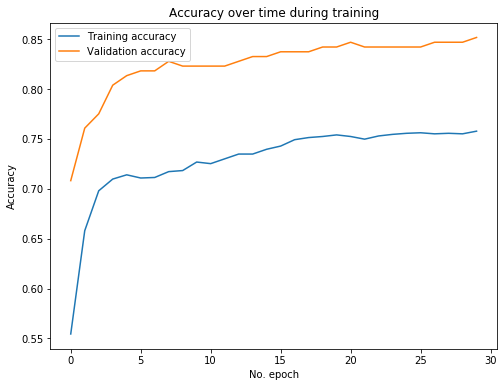

In [8]:
print(history.history.keys())
    
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over time during training')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

As can be seen in the accuracy it still tend to rise after 10 Epochs. Therefor a larger amount of epochs can be adviced. However as can be seen the curve does become more stable here and the amount of accuracy gain needs to be balanced with the speed of the model when increasing the amount of epochs. Taking this into account we can conclude that from 10 epochs a sort of plateau level for the accuracy is reached and that this amount would be sufficient. 

In [18]:
y_pred = model.predict(X_test)

As a result of the softmax, y_pred can be interpreted as a probability or confidence of the model's production. However, in order to determine confusion matrix etc, ...  a threshold needs to be applied. The most natural threshold is 0.5.

In [21]:
#setting a threshold value of 0,5

y_pre = y_pred[:,0]>0.5

In [31]:
from sklearn.metrics import confusion_matrix

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test[:,0], y_pre).ravel()
tot = tn+fp+fn+tp
print('number of test cases: ', tot)
print('-'*100)
print('True positive: ', np.round(tp/tot,3)*100,'%', '    False positive: ', np.round(fp/tot,3)*100,'%',
          '    True negative: ', np.round(tn/tot,3)*100,'%', '    False negative: ', np.round(fn/tot,3)*100,'%')

number of test cases:  232
----------------------------------------------------------------------------------------------------
True positive:  36.6 %     False positive:  3.9 %     True negative:  50.9 %     False negative:  8.6 %


In [36]:
from sklearn.metrics import classification_report

# classification report
for tr in [0.35,0.40,0.45,0.5,0.55,0.6,65]:
    print('Threshhold value: ', tr)
    print('-'*100)
    y_pre = y_pred[:,0] > tr
    print(classification_report(y_test[:,0], y_pre))
    recal = recall_score(y_test[:,0], y_pre)
    precission = precision_score(y_test[:,0], y_pre)
    ratio.append(precission/recal)
    print('-')

tresh = [0.35,0.40,0.45,0.5,0.55,0.6,65]
print(ratio)
print(tresh)

Threshhold value:  0.35
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       127
           1       0.85      0.82      0.83       105

    accuracy                           0.85       232
   macro avg       0.85      0.85      0.85       232
weighted avg       0.85      0.85      0.85       232

-
Threshhold value:  0.4
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       127
           1       0.87      0.82      0.84       105

    accuracy                           0.86       232
   macro avg       0.86      0.86      0.86       232
weighted avg       0.86      0.86      0.86       232

-
Threshhold value:  0.45
---------------------------------------------------------------------

/home/nathan/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A	decision	making	threshold	is	the	value	of	the	decision	making	variable	at	which	the	
decision	is	made.The highest accuracy can be found at a threshold of 0.5 and 0.45. We see that for higher threshhold values the accuracy quickly drops.For lower threshold values the accuracy doesn't drop as fast. 

In [ ]:
plt.title('Precission recall - ratio')
plt.plot(tresh, ratio, 'b', label = 'precission/recal ratio' )
plt.legend(loc = 'lower right')

plt.xlim([0.3, 0.7])
plt.ylim([0, 1.5])
plt.ylabel('Precission/recall ratio')
plt.xlabel('Thresholds')
plt.show()

Precision and recall are two extremely important model evaluation metrics. While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm. High precision relates to a low false positive rate, and high recall relates to a low false negative rate. High values for both depict a high accurate classifier. This is the case for the threshold values of 0,5

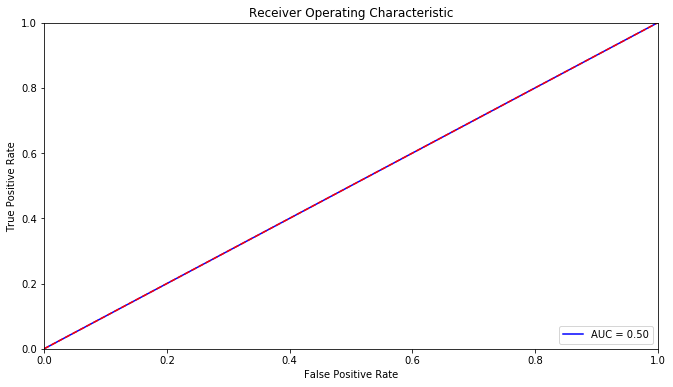

In [41]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:,0], y_pre)

roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.rcParams['figure.figsize'] = [11, 6]
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The computed ROC-curve lies on the diagonal line. Which means that it has a very low accuracy. One could as well guess instead of using the model. Is this correct? 

### Task 3: Test the model
Use **predict** method to test a single test sample. Plot the patch and include in the title its ground truth and the prediction. Now, test all the test samples using a for loop and print the accuracy for a decision threshold of 0.5. Additionally, print the **confusion matrix** for the same decision threshold and comment on your findings. Do you think it's necessary to investigate our system's performance by setting different decision thresholds? What performance measurement should we use?

Print the ROC curve and comment.

No its not necessary to investigate different thresholds, 0.5 should be the optimal choice. As we have seen in the previous tast 0.5 conducts into the highest accuracy wich is a good measure. Since we are detecting lung cancer it may also be interesting to minimize false negatives.

Volgens mij is wat ze hier vragen ook exact wat je hierboven gedaan hebt? 
Maar was dat voor 1 test sample en dan voor meer dan 1? Want ge hebt direct nen predict gedaan op X_test? zijn dat niet direct alle testsamples dan? 

### Task 4.1: Artificial Neural Networks (3 layers) - Let's go deep!

Let's try 3 fully-connected layers using **sigmoid** activation function. Choose different values for the learning rate, number of epochs and batch size (e.g. 10, 20, 30...). 

Here is an example network but you are free to choose your own network.
* 1st FC with 80 neurons, sigmoid/relu
* 2nd FC with 40 neurons, sigmoid/relu
* 3rd FC with 2 neurons and softmax
* optimizer: sgd or adam or ...

Explain your network's architecture and **test** your system as you did for the previous simple neural network. What do you observation? Print some graphs which indicate **underfitting** and **overfitting**. 

Underfitting occurs at the start of the training, when the the model doesn't fit that data properly yet. 
Overfitting occurs when the training goes on for too long and the model fits the traininng data too good,resulting in a higher training accuracy but lower validation accuracy. Overfitting will influence the generalization of the model. The model will give an almost perfect fit on the given test data but will probably fail once it is used for new real world unseen data.

In [7]:
# Code for Part 2: Task 4.1
num_classes = 2
    
model = Sequential()
model.add(Dense(80, activation='sigmoid', input_dim=400))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
    
model.summary()
    
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                32080     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 35,402
Trainable params: 35,402
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X, y, epochs=50, batch_size=8, shuffle=True, validation_split=0.2)

Train on 1874 samples, validate on 209 samples
Epoch 1/30
1874/1874 [==============================] - 1s 335us/step - loss: 0.6761 - accuracy: 0.6009 - val_loss: 0.6360 - val_accuracy: 0.7656
Epoch 2/30
1874/1874 [==============================] - 0s 207us/step - loss: 0.6362 - accuracy: 0.7129 - val_loss: 0.5948 - val_accuracy: 0.7847
Epoch 3/30
1874/1874 [==============================] - 0s 214us/step - loss: 0.6088 - accuracy: 0.7220 - val_loss: 0.5675 - val_accuracy: 0.7656
Epoch 4/30
1874/1874 [==============================] - 0s 213us/step - loss: 0.5899 - accuracy: 0.7161 - val_loss: 0.5411 - val_accuracy: 0.7656
Epoch 5/30
1874/1874 [==============================] - 0s 222us/step - loss: 0.5771 - accuracy: 0.7177 - val_loss: 0.5220 - val_accuracy: 0.7703
Epoch 6/30
1874/1874 [==============================] - 0s 230us/step - loss: 0.5674 - accuracy: 0.7166 - val_loss: 0.5135 - val_accuracy: 0.7703
Epoch 7/30
1874/1874 [==============================] - 0s 218us/step - loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


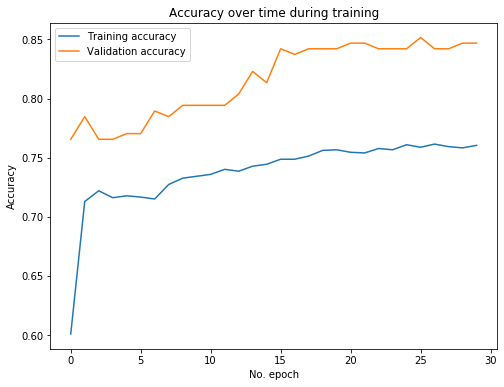

In [9]:
print(history.history.keys())
    
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over time during training')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show();

To evaluate over- and underfitting a simulation with a lot of epochs was made. As can be seen for few amount of epochs
the validation accuracy and training accuracy are off. A an intermediate amount the two graphs tend to go togheter and for a large amount of epochs
the grapsh once again diverge. In the beginning underfitting is done and the training is not sufficient when compared to validation.
At the end the model is overfit. It can coop good with the training data but once validated on new data one can see that it starts to fail. 

Ik weet wel niet helemaal of de grafieken juist zijn. Ik krijg als ik het run op de data die zei gegeven hadden grafieken die in accuracy voor beide mooi op elkaar liggen?

### Task 4.2: Relu!
RELU = Rectified Linear Unit

Let's try the same network but using RELU instead of sigmoid now.

In [ ]:
# there shouldn't be that mch different with different non-linear functions.

In [ ]:
num_classes = 2
    
model = Sequential()
model.add(Dense(80, activation='relu', input_dim=400))
model.add(Dense(40, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
model.summary()
    
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X, y, epochs=30, batch_size=8, shuffle=True, validation_split=0.10)

Train on 1874 samples, validate on 209 samples
Epoch 1/30
1874/1874 [==============================] - 0s 219us/step - loss: 0.4160 - accuracy: 0.8175 - val_loss: 0.3517 - val_accuracy: 0.8900
Epoch 2/30
1874/1874 [==============================] - 0s 208us/step - loss: 0.4116 - accuracy: 0.8228 - val_loss: 0.3456 - val_accuracy: 0.8947
Epoch 3/30
1874/1874 [==============================] - 0s 212us/step - loss: 0.4056 - accuracy: 0.8255 - val_loss: 0.3389 - val_accuracy: 0.8900
Epoch 4/30
1874/1874 [==============================] - 0s 213us/step - loss: 0.4011 - accuracy: 0.8250 - val_loss: 0.3416 - val_accuracy: 0.8995
Epoch 5/30
1874/1874 [==============================] - 0s 218us/step - loss: 0.3960 - accuracy: 0.8303 - val_loss: 0.3375 - val_accuracy: 0.8995
Epoch 6/30
1874/1874 [==============================] - 0s 218us/step - loss: 0.3913 - accuracy: 0.8319 - val_loss: 0.3375 - val_accuracy: 0.8900
Epoch 7/30
1874/1874 [==============================] - 0s 216us/step - loss:

In [ ]:
print(history.history.keys())
    
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over time during training')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show();

For the relu activation function it can be seen that the model learns much faster compared to the sigmoid activation function. This is because the sigmoid curve kills gradients and does not give fast and adequate feedback to the weights. While the RELU activation function trains much faster and so accelerates the convergence of the model.

### Task 4.3: Dropout!
Use dropout. Some recommended values to investigate are 0.9, 0.5, 0.1. Explain the results.

ANSWER HERE

In [ ]:
# there should be less overfitting with more dropout

In [55]:
# Code for Part 2: Task 4.3
def dropout(drop):
    num_classes = 2
    
    model = Sequential()
    model.add(Dense(80, activation='sigmoid', input_dim=400))
    model.add(Dropout(drop))
    model.add(Dense(40, activation='sigmoid'))
    model.add(Dropout(drop))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X, y, epochs=30, batch_size=8, shuffle=True, validation_split=0.10)
    
    print(history.history.keys())
    
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy over time during training')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show();

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 80)                32080     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 82        
Total params: 35,402
Trainable params: 35,402
Non-trainable params: 0
_________________________________________________________________
Train on 1874 samples, validate on 209 samples
Epoch 1/30
1874/1874 [==============================] - 1s 336us/step

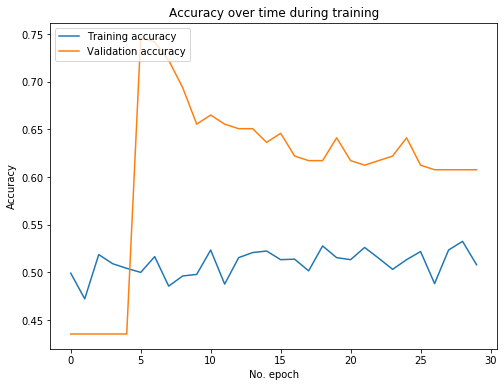

In [56]:
dropout(0.9)

In [ ]:
dropout(0.5)

In [ ]:
dropour(0.1)

Using dropout is a  regularisation technique. It randomly drops units during training. The goal is to reduce overfitting and decrease a generalization error. For the values the following scaling was used, 1.0 means no dropout, and 0.0 means no outputs from the layer. It can be clearly see that by increasing dropout level higher accuracy are much faster reached. Also convergence between validation and training accuracy is much faster accomplished.

### Task 5. A Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 3x3, number of channels = 64, activation function = sigmoid
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 50 neurons, activation function = sigmoid
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

In [ ]:
# input image dimensions
img_x, img_y = 400, 400

input_shape = (img_x, img_y, 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
#model.summary()  #waarom nodig?
    
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
history = model.fit(X, y, epochs=30, batch_size=8, shuffle=True, validation_split=0.10)
    
print(history.history.keys())
    
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over time during training')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show();

In [0]:
# Code for Part 2: Task 5

### Task 6. A Deeper Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> conv3 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 5x5, number of channels = 64, activation function = relu
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 100 neurons, activation function = relu
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

In [0]:
# Code for Part 2: Task 6
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
#model.summary()  #waarom nodig?
    
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
history = model.fit(X, y, epochs=30, batch_size=8, shuffle=True, validation_split=0.10)
    
print(history.history.keys())
    
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over time during training')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show();

### Task 7


Comment the network differences between the two convolutional neural networks. Which ones do you think have the strongest impact in the network's perfomance? Justify your answer. 

An implementation of one or more networks might be necessary to answer this question.

ANSWER HERE

### (BONUS) Create your own convolution neural network

Create your own network and try to increase model's accuracy. You can use different:
* size of convolutional kernels
* activation functions
* optimizers ...
***

* **Extra task**: Select a different part of the dataset as test-set and repeat the training tasks

In [0]:
# UNET